![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. 

In [4]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We used a few special parameters to correctly parse the csv. As the header is missing, pandas is assigning numbers to the columns.

**This is when the fun starts...**
<br><br><br>

---

### Exercise: Rename the columns

Use the names contained in `col_names` to properly name the columns (and replace the numbers). 

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

Once everything works, it'll look something like this:

In [6]:
df.columns = col_names
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Exercise: Cleaning the data

You'll notice that some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass` (spoiler, it's a `?` question mark):

In [7]:
# Results

In [8]:
for col in df.columns:
    print("Column: {}, unique values: {}".format(col, df[col].unique()))

Column: age, unique values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Column: workclass, unique values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Column: fnlwgt, unique values: [ 77516  83311 215646 ...  34066  84661 257302]
Column: education, unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Column: education-num, unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Column: marital-status, unique values: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Column: occupation, unique values: ['Adm-clerical' 'Exec-managerial'

In [9]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df.replace(to_replace='?', value=np.nan, inplace=True)
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

SyntaxError: invalid syntax (<ipython-input-14-c58574eb00b7>, line 3)

In [ ]:
# Result:
df.info()

### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [ ]:
df['income'].value_counts()

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [17]:
# Expected result:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

In [16]:
cat_type = CategoricalDtype(['<=50K', '>50K'], ordered=True)
df['income'] = df['income'].astype(cat_type)
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [21]:
# Expected result:

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


In [22]:
pd.get_dummies(df['income'])
df = pd.concat([df, pd.get_dummies(df['income'])], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


### Exercise: Plot a **distplot** showing the distribution of `age`.

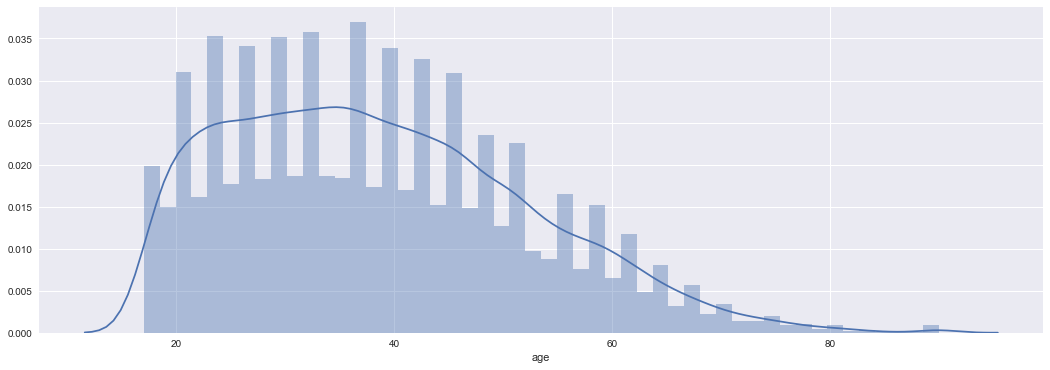

In [57]:
# Expected output

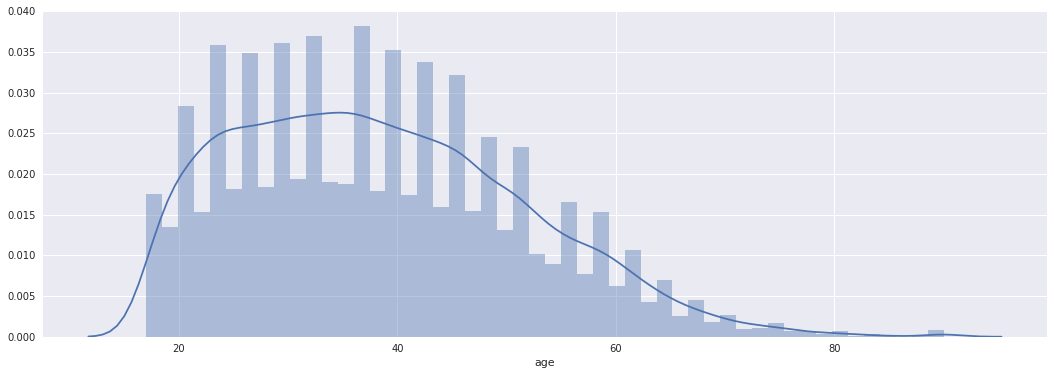

In [23]:
sns.distplot(df['age'])

### Exercise: Plot a **boxplot** showing the distribution of `age`.

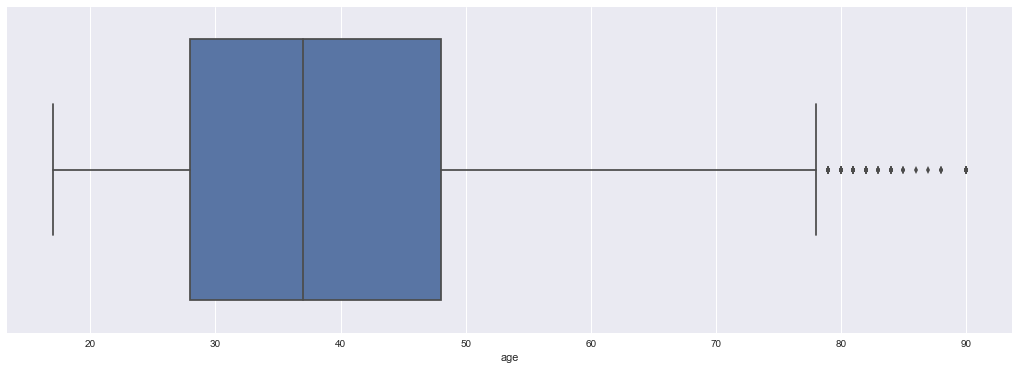

In [56]:
# Expected output

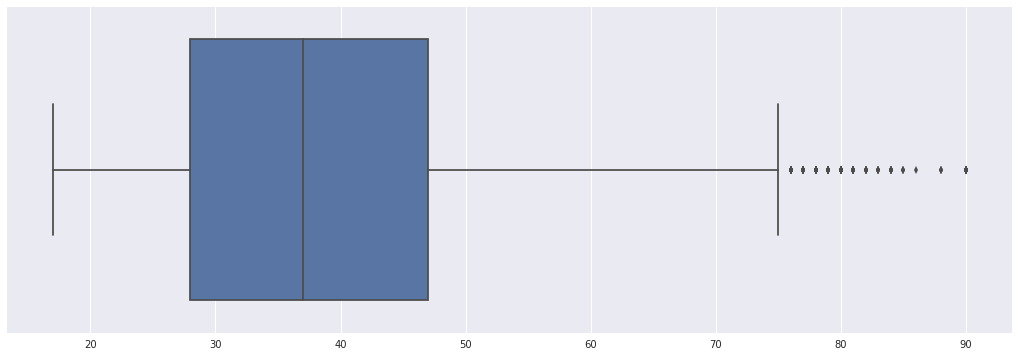

In [25]:
sns.boxplot(x=df['age'].to_frame())

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

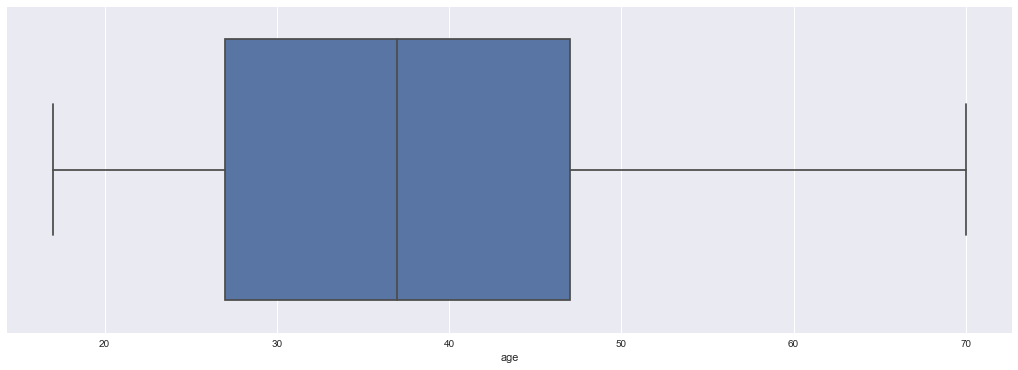

In [54]:
# Expected solution:

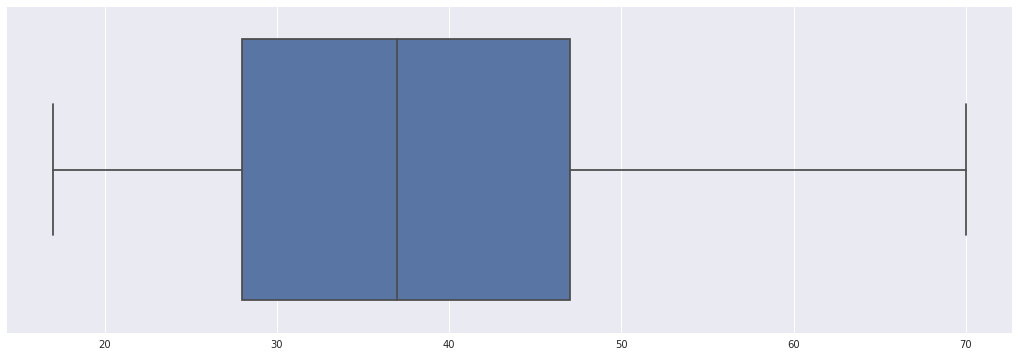

In [30]:
no_outliers = df.loc[df['age'] <= 70]
sns.boxplot(x=no_outliers['age'].to_frame())

### Exercise: How many people work more than 20 hours per week?

In [22]:
# Expected output

29633

In [38]:
df.loc[df['hours-per-week']>20, 'hours-per-week'].count()

27774

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [25]:
# Expected output

Male count: 21790
Female count: 10771
Male proportion: 0.6692054912318418
Female proportion: 0.33079450876815825


In [54]:
males = df.loc[df['sex'] == 'Male', 'sex'].count()
females = df.loc[df['sex'] == 'Female', 'sex'].count()
proportion_m = males/(males+females)
proportion_f = females/(males+females)
print("Male count: {}\n".format(males), "Female count: {}\n".format(females), 'Male prop: {}\n'.format(proportion_m), 'Female prop: {}\n'.format(proportion_f))

Male count: 20380
 Female count: 9782
 Male prop: 0.6756846362973278
 Female prop: 0.3243153637026722



### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

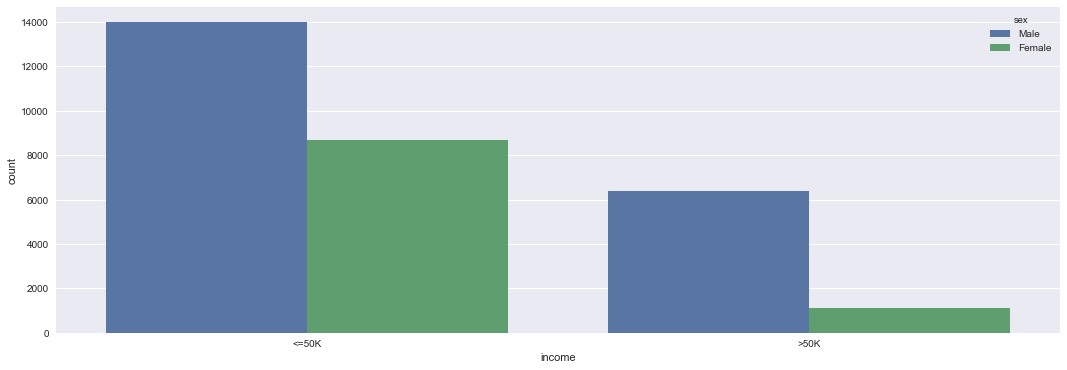

In [65]:
# Expected Result:

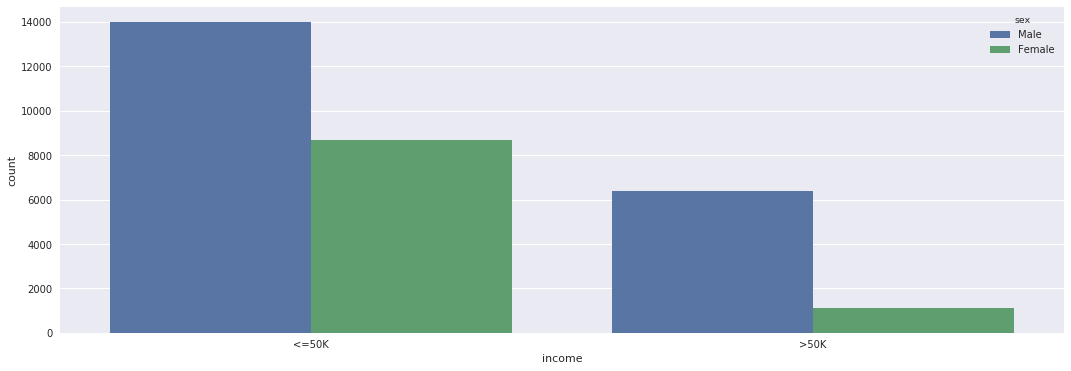

In [59]:
sns.countplot(x='income', hue='sex', data=df)

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

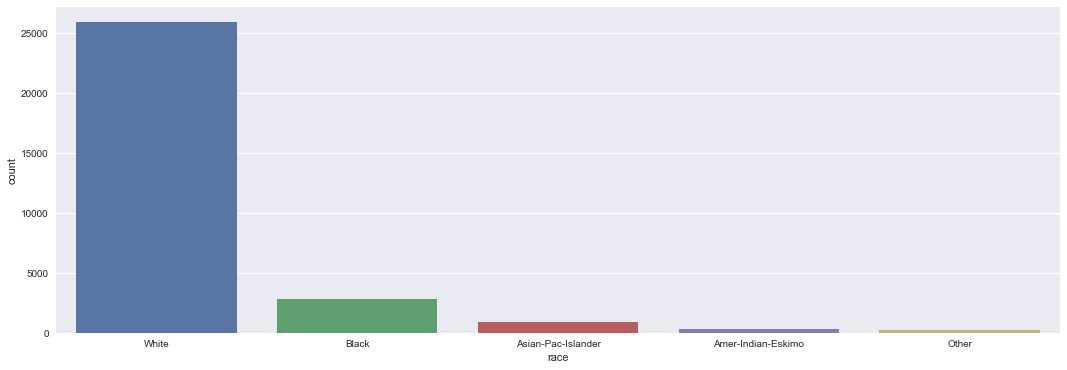

In [84]:
# Expected result

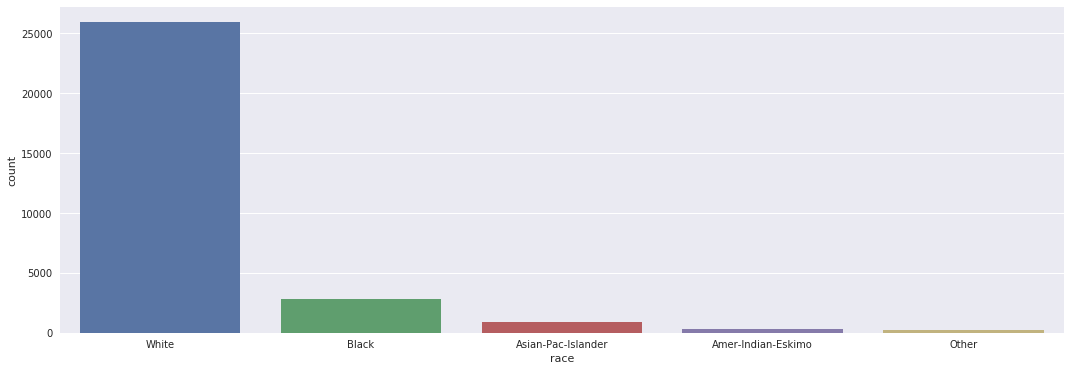

In [63]:
sns.countplot(x='race',data=df)

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [18]:
# Expected result:

,race,count
0,Amer-Indian-Eskimo,311
1,Asian-Pac-Islander,1039
2,Black,3124
3,Other,271
4,White,27816


In [66]:
df['race'].groupby(df['race']).count().to_frame()

,race
race,
Amer-Indian-Eskimo,286
Asian-Pac-Islander,895
Black,2817
Other,231
White,25933


### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

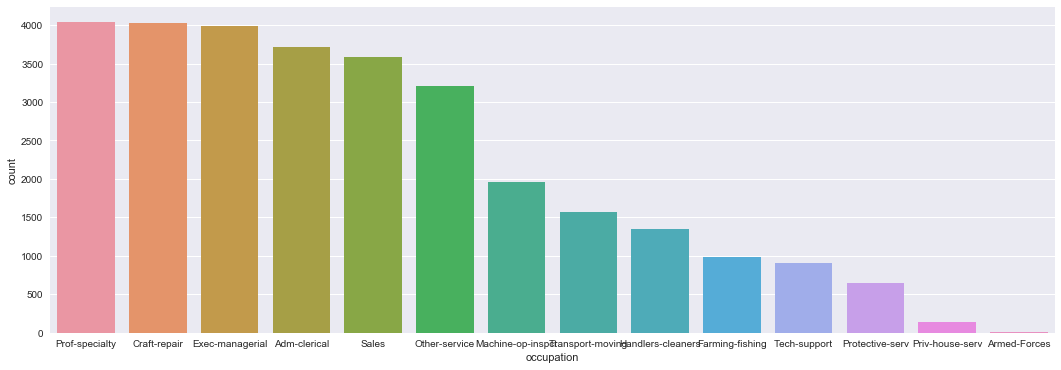

In [80]:
# Expected result:

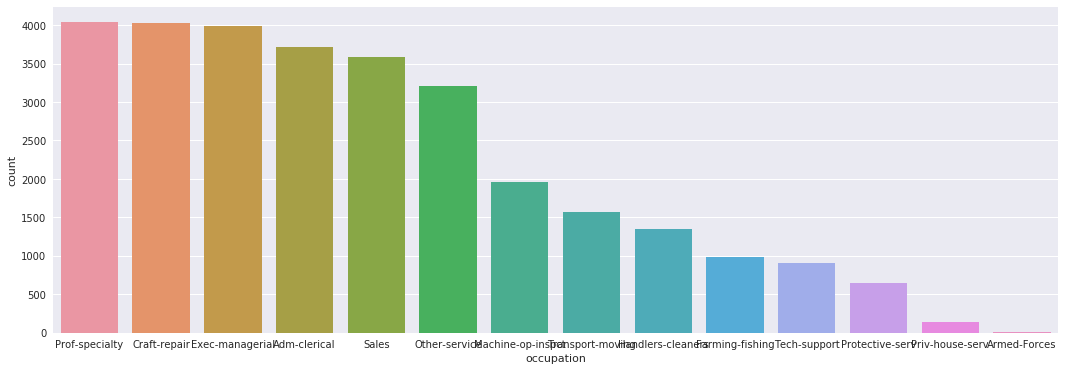

In [69]:
sns.countplot(x='occupation', data=df, order=df['occupation'].value_counts().index)

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [121]:
# Expected output

,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


In [76]:
df.groupby('occupation')['age'].count().to_frame()

,age
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

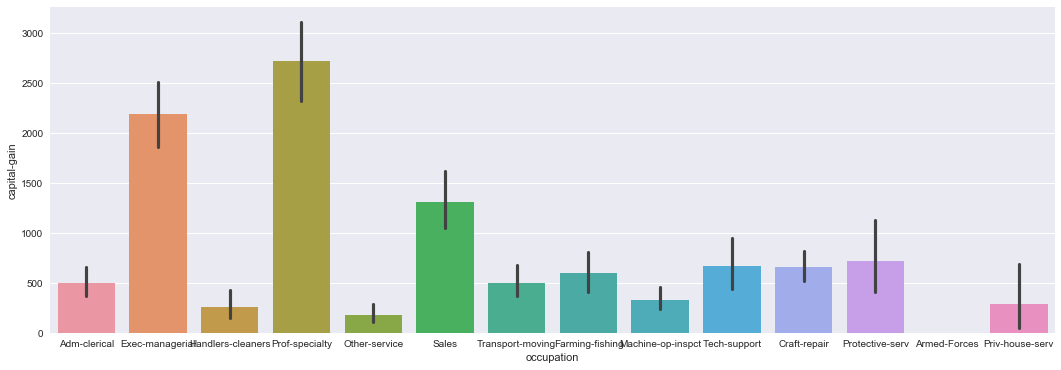

In [83]:
# Expected result:

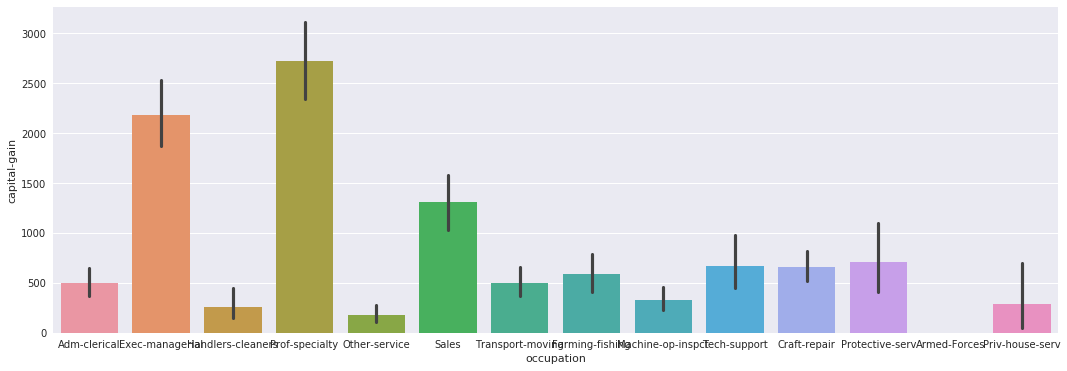

In [81]:
sns.barplot(y='capital-gain',x='occupation',data=df,estimator=np.mean)

### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [110]:
# Expected result

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

In [83]:
df['capital-gain'].groupby(df['occupation']).mean().to_frame()

,capital-gain
occupation,
Adm-clerical,497.097286
Armed-Forces,0.000000
Craft-repair,657.586849
Exec-managerial,2185.330912
Farming-fishing,592.707786
Handlers-cleaners,258.140000
Machine-op-inspct,323.825025
Other-service,181.705479
Priv-house-serv,291.594406


### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

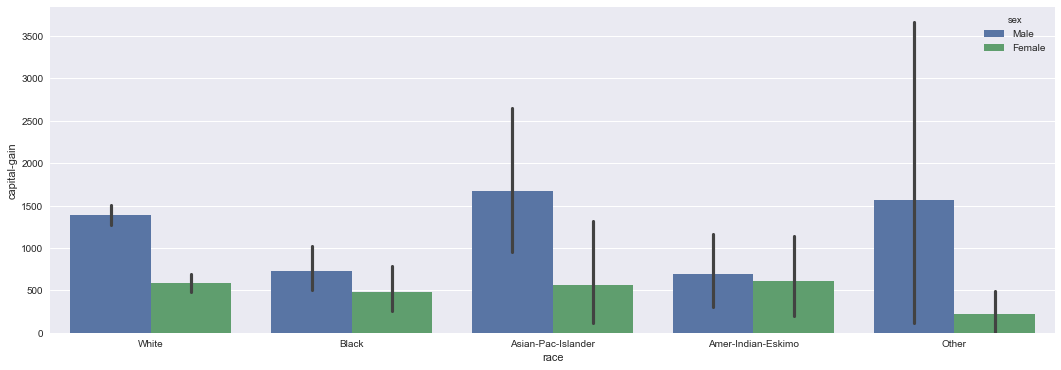

In [89]:
# Expected output

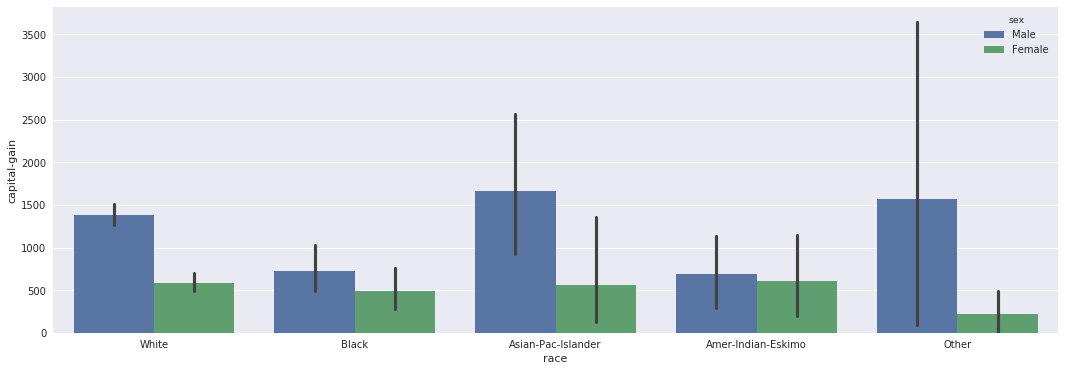

In [84]:
sns.barplot(x='race',hue='sex', y='capital-gain', estimator=np.mean, data=df)

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [92]:
# Expected output

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [86]:
df['capital-gain'].groupby([df['race'],df['sex']]).mean().to_frame()

capital-gain
race               sex                 
Amer-Indian-Eskimo Female    605.682243
                   Male      692.932961
Asian-Pac-Islander Female    564.204082
                   Male     1666.455907
Black              Female    484.871337
                   Male      722.966855
Other              Female    223.873563
                   Male     1566.208333
White              Female    588.850285
                   Male     1385.042466

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)